# Notebook Parameters

In [1]:
main_dir = '../'
# path to dataset directory (if CMIP6 data must be in the proper grid format)
# dataset_dir = f'{main_dir}/data/projections/nicam16-9s/'
dataset_dir = f'{main_dir}/data/dataset/'
# path to model that we want to use in inference
model_dir = f'{main_dir}/backup/01_vgg_v3_relu/'
# path to IBTrACS file to match ML model detections
ibtracs_src = f'{main_dir}/data/ibtracs/full/ibtracs_ALL.1980-2020_main_tracks_only_6_hourly.csv'
# scalers directory
scaler_dir = f'{main_dir}/data/scaler'
# define lat and lon ranges
lat_range = (0,70)
lon_range = (100,320)
# determine if the dataset is projection or not
is_cmip6 = False

## Inference Workflow

In [2]:
import torch
import sys

import warnings
warnings.filterwarnings('ignore')

sys.path.append('../library')
from tropical_cyclone.inference import Inference
from tropical_cyclone.visualize import plot_detections, plot_tracks

In [3]:
inference = Inference(model_dir=model_dir, 
                      dataset_dir=dataset_dir, 
                      ibtracs_src=ibtracs_src, 
                      lat_range=lat_range, 
                      lon_range=lon_range, 
                      is_cmip6=is_cmip6, 
                      device='mps')
inference.predict(year=2015)
detections, observations = inference.detections, inference.observations

100%|██████████| 1/1 [00:00<00:00,  2.61it/s]


# Apply Tracking Algorithm

In [4]:
det_tracks = inference.tracking(min_track_count=12)
obs_tracks = inference.get_observed_tracks()

## Detections

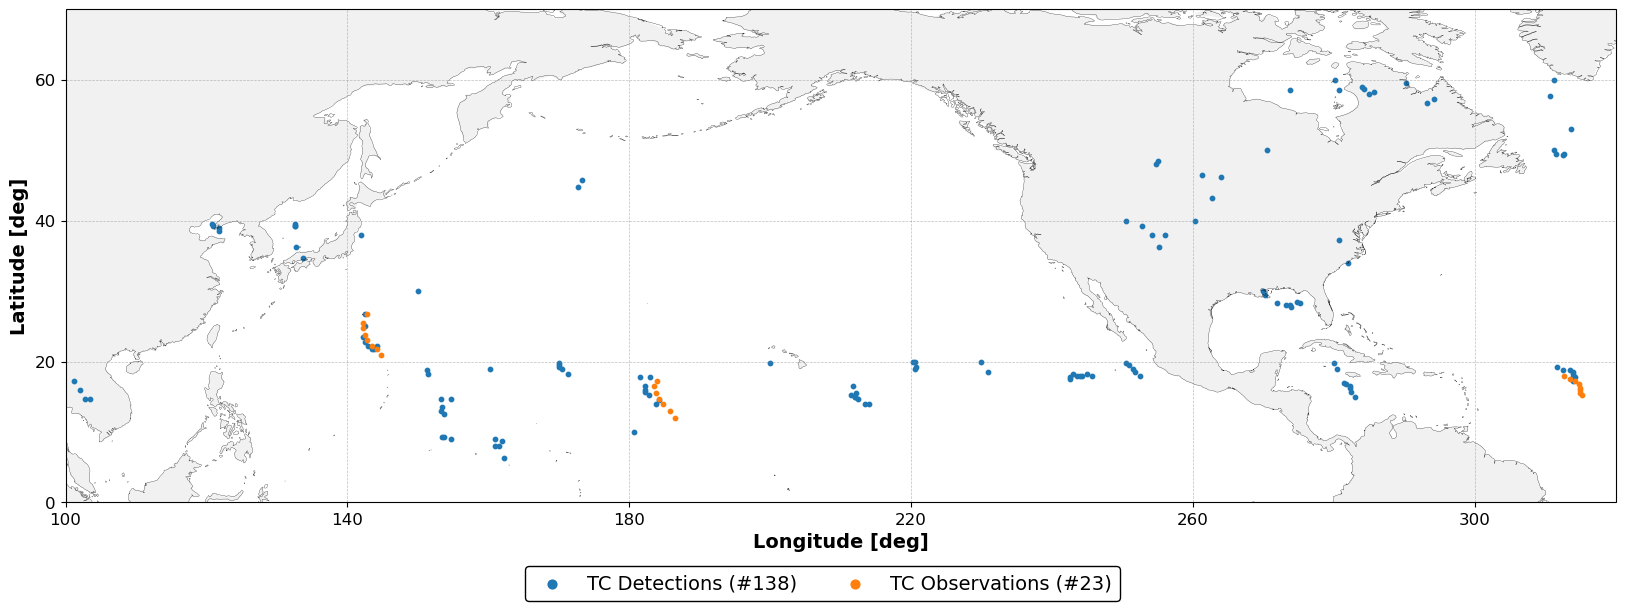

In [5]:
plot_detections(detections, observations, lat_range, lon_range)

## Tracks

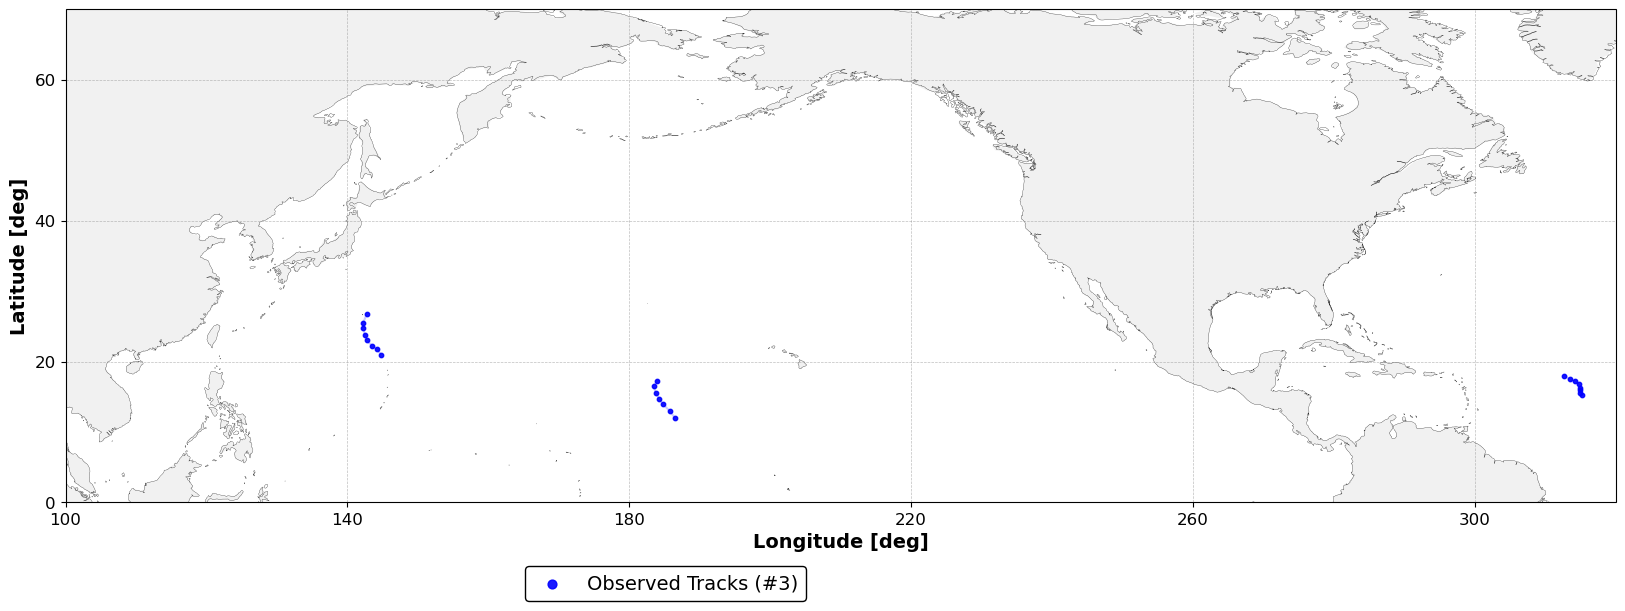

In [6]:
plot_tracks(det_tracks, obs_tracks, lat_range, lon_range)